<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/10_Neural_document_summarization_by_jointly_learning_to_score_and_select_sentences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural document summarization by jointly learning to score and select sentences (ACL)

## Background

SummaRuNNer: A Recurrent Neural Network based Sequence Model for Extractive Summarization of Documents (AAAI)

 - 두개의 양방향 RNN 사용
 - 매 타임스탭 마다 단어를 입력으로 받아 vector를 생성 후 평균 풀링을 진행하여 한 문장을 하나의 벡터로 표현 
 - 문장 벡터들이 순차적으로 RNN을 거쳐 Classification 수행 
 - 일반적인 Classification과는 달리 다양한 파라미터를 추가해서 고유성, 차별성, 위치 정보 등을 고려함 



##Abstract

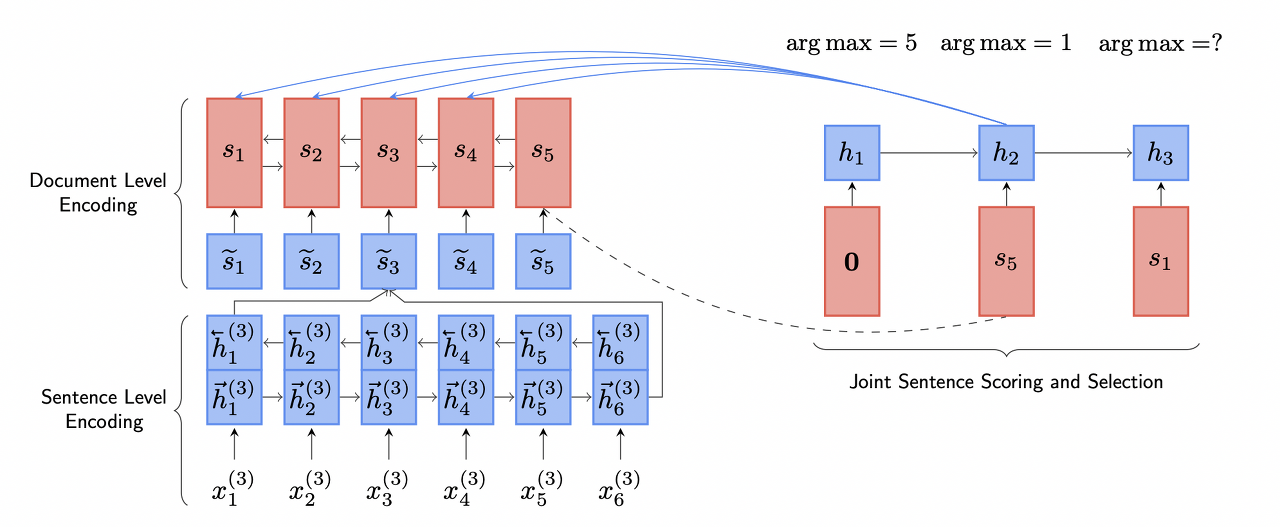

문장 채점과 문장 선택은 추출 문서 요약 시스템의 두 가지 주요 단계이다. 

그러나 이전 연구에서는 두 개의 분리된 하위 작업으로 취급한다. 

본 논문에서, 우리는 문장 채점과 선택을 공동으로 학습함으로써 추출 문서 요약을 위한 새로운 종단 간 신경망 프레임워크를 제시한다. 

먼저 계층적 인코더로 문서 문장을 읽어 엔트리의 표현을 얻는다. 그런 다음 문장을 하나씩 추출하여 출력 요약을 작성합니다. 

이전 방법과 달리, 우리의 접근 방식은 선택 전략을 점수 매기기 모델에 통합하여 이전에 선택한 문장이 주어진 상대적 중요성을 직접 예측한다. 

CNN/Daily Mail 데이터 세트에 대한 실험은 제안된 프레임워크가 최첨단 추출 요약 모델을 크게 능가한다는 것을 보여준다.

- 기존 추출 요약에서는 각 문장에 점수를 매긴 후, 점수에 기반하여 추출 요약문으로 선정할지를 판단하는데 해당 모델을 두 작업을 하나로 통합한다. 
- 추출 요약문으로 선정될 문장은 1, 그렇지 않은 문장을 0으로 선정하는 기존방식과는 다르게 
- ROUGE Score에 기반한 목적함수를 사용함(각 문장의 레이블은 연속적인 값을 갖음)
- 매 타임스탭마다 해당 문장이 추출 요약문에 포함할지 여부를 변화하는 ROUGE Score에 따라 판단


##Introduction 

자동 요약에서 핵심은 문장 단위의 중요 컨텐츠를 식별하는 것 

1. 이전 방식 
    1. sentence scoring : 각 문장의 중요도를 계산
        - Feature 기반 : 단어 확률, TF-IDF, 문장 위치 등 활용
        - Graph 기반 : TextRank, LexRank
        - Neural Network 기반
    2. sentence selection : scoring 기반
        - Maximal Marginal Relevance(MMR) : 최대 점수, 최소 중복 
        - Integer Linear Programming (ILP)
        - Submodular functions
        - Neural Network 기반 

NeuSUM
1. [문장 평가 + 문장 선택] = 하나로 결합된 end-to-end model
2. 앞서 추출된 요약 문장들의 정보를 함께 고려해 각 요약 문장을 선택하는 특징을 가짐
3. Without handcrafted features
4. CNN/Daily Mail 데이터셋에서 최고의 성능을 기록함 (state-of-the-art)


 ## Model 
 

신경 추출 문서 요약(NEUSUM) 프레임워크를 제시
 
 제안된 모델은 문서 인코더와 문장 추출기의 두 부분으로 구성된다. 
 
 1. 문서 인코더
    - 문서 내의 모든 문장을 벡터로 변환하는 부분 
    - 자연어 문장의 실제 구성처럼 계측적 구조를 가짐(단어 - 문장 - 문서)
 
 2. 문장 추출기
    - 순환 신경망(RNN)으로 구축
    - 매 시점마다 과거에 추출된 문장들(요약문)에 대한 정보 저장/유지
    - 매 시점마다 문장 추출 상태 제공 -> 문장 평가에 활용
    

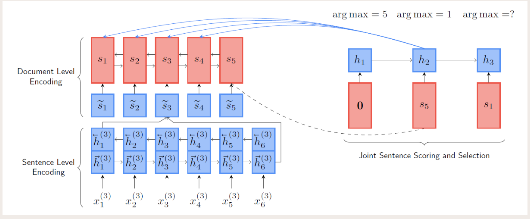

문서 인코더에서 문서 전체의 문장들이 인코딩되어 전달되면, 문장 추출부에서 매 시점마다 각 문장을 평가하고 문장 수 제한에 도달할 때까지 요약문을 추가함

문서 인코더 : 두 단계의 계층적인 BiGRU 층으로 구성됨 
1. 문장 단위의 인코딩층
    - 각 토큰을 BiGRU 층에 통과시켜 문장의 임베딩 벡터를 생성함( 마지막 시점의 히든 벡터 2개 결합)
2. 문서 단위의 인코딩층
    - 각 문장의 임베딩 벡터들을 인코딩 BiGRU 층에 통과시켜 문서의 임베딩, 즉 문장 임베딩 벡터들의 집합을 생성함 ( 각 시점의 히든 벡터 결합)

    

문장 추출부 : GRU층과 MLP층으로 구성됨

- 문장 추출부는 최종적으로 문장을 추출해 요약문을 생성할 때 
    1. 이전에 선택된 문장들의 정보를 기억하고 
    2. 아직 선택되지 않은 남은 문장들의 중요도를 평가함 

1. GRU 층에서는 직전 시점(t-1)에 선택된 문장의 임베딩 벡터를 통과시켜 현재 시점(t)의 히든 벡터(h_t)를 생성함 
2. MLP 층에서는 현재 시점의 히든 벡터(h_t)와 현재 시점 문장의 임베딩 벡터를 통과시켜 문장 중요도를 계산함
    - 이상의 과정을 통해 t시점에 계산된 모든 문장들의 중요도를 바탕으로, 가장 중요도가 높은 문장을 요약문으로 추출함.


목적 함수 
- NEUSUM 모델의 목적 함수는 모델의 예측값 P와 학습데이터의 라벨값 Q 간의 Kullback - Leibler(KL) divergence를 사용함 

1. P계산하기 위해, 모델이 예측한 각 문장들의 중요도를 softmax 함수로 정규화함
2. Q를 계산하기 전에, 각 문장의 ROUGE F1 gain 점수가 음수일 수 있음을 고려하여 [0,1] 값으로 스케일링하기 위해서 Min-Max 정규화를 적용함 
3. Q계산하기 위해, 각 문장의 ROUGE F1 gain점수를 softmax 함수로 정규화함 


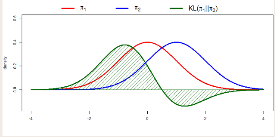

## Evalution

1. Dataset 
    1. CNN/Daily Mail Dataset 사용
        - 기사와 기사의 하이라이트부분을 포함하고 있는 데이터세이지만 추출 요약으로 사용하기에는 부족하여 추출요약문 직접 생성 

    2. 각 문장과 기존 요약문을 대조하며, ROUGE-2 F1 점수가 높은 문장 조합을 추출 요약문으로 생성함 
        - 문장 조합의 경우의 수가 많아 계산 비용이 큰 -> Greedy 접근법
        1. 1문장의 조합들에 대해 ROUGE-2 F1 점수를 계산함
        2. 1문장씩 늘려가며 k문장의 조합들에 대해 ROUGE-2 F1 점수를 계산함
        3. k문장의 조합들에 대한 ROUGE-2 F1 점수들 중 최댓값이 이전 k-1까지의 최댓값보다 작을 경우 중단함

    3. Data preprocessing
        - 고유명사들은 익명화된 식별자로 대체됨

2. Model Training
    - 각 문서는 80문장으로 제한했고, 각 문장은 100단어로 제한함
    

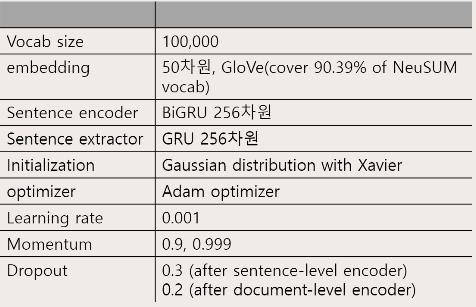

3. Model Testing 
    - 모델 성능비교에 사용된 모델들 
    1. LEAD3
    2. TextRank
    3. CRSUM
    4. NN-SE
    5. SUMMARUNNER
    6. PGN
    - 모델 간의 비교 평가에는 ROUGE-1, ROUGE-2, ROUGE-L(LCS) 지표가 사요됨

    - 생성된 요약문에 대해 사람이 정성평가를 추가로 수행함
    


## Conclution

추출 문서 요약을 위한 공동 문장 점수 매기기 및 선택 모델을 제안한다. 

1. 문장 선택의 정확도

 - 본 논문에서는 각 시점별 예측값에 대한 정확도를 계산해 NEUSUM모델과 NN-SE모델을 비교함 

 - 모든 시점에서 NEUSUM이 NN_SE보다 정확했으며, 특히 t=2 에서 간극이 커짐

2. 문장 포지션 
 - 본 논문에서는 요약문으로 추출된 문장들의 위치 분포를 통해 NEUSUM 모델과 NN-SE 모델을 비교함
 - NEUSUM의 위치 분포는 NN-SE보다 넓게 퍼져 있으며, 정답 요약문과도 더 분포가 유사함
 
제안된 모델은 수공예 기능 없이 종단 간 교육이 가능하다. 
제안된 모델은 최첨단 방법을 크게 능가하며 CNN/Daily Mail 데이터 세트에서 최상의 결과를 달성한다.

출처 : https://arxiv.org/abs/1807.02305
출처 : https://www.youtube.com/watch?v=re5Uhi2DuoU